In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

max_rent_price = 1500

In [2]:
df = pd.read_excel("input.xlsx")
df.head()
df =df.drop([df[pd.isna(df["Kaina mėn.:"])].index][0])

## Cleaning target col

In [3]:
try:
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' €','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' ','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].astype(int)
    df = df[df['Kaina mėn.:']< max_rent_price]
except:
    print("Target col is converted")
df.rename(columns={"Kaina mėn.:": "rent_price"}, inplace=True)
df['rent_price'].describe()

count    2027.000000
mean      514.512580
std       248.492365
min        15.000000
25%       350.000000
50%       460.000000
75%       650.000000
max      1480.000000
Name: rent_price, dtype: float64

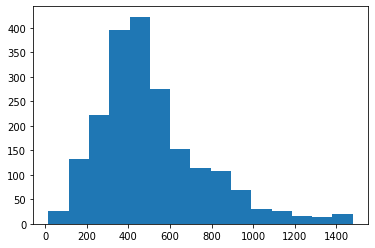

In [4]:
n_bins = 15
plt.hist(df[df["rent_price"] < max_rent_price]["rent_price"], bins=n_bins)
plt.show()

## Cleaning feature cols

In [5]:
df.rename(columns={"Aukštas:": "floor", "Aukštų sk.:": "total_floor_num", "Kambarių sk.:":"room_num", "Metai:":"year_full", "Plotas:":"area"}, inplace=True)
df.dtypes

df["year_full"].fillna(0, inplace = True)
# df["year"] = pd.to_numeric(df["year"],downcast='integer')

# df[cols] = df[cols].apply(pd.fillna,0, axis=1)
# df[cols] = df[cols].apply(pd.to_numeric, downcast='integer', errors='coerce', axis=1)

In [6]:
df[['year','year_renovation']] = df['year_full'].str.split(',',expand=True)
# cut year int
df['year'] = df['year_full'].str[:4]
df['year'].fillna(df["year_full"],inplace = True)
df["year"] = pd.to_numeric(df["year"],downcast='integer')
df['year_renovation'] = df['year_renovation'].str[:5]
df["year_renovation"] = pd.to_numeric(df["year_renovation"],downcast='integer')

In [7]:
try:
    df['area'] = df['area'].str.replace(' m²','')
    df['area'] = df['area'].str.replace(',','.')
except:
    print("Target col is converted")
df["area"] = pd.to_numeric(df["area"],downcast='float')

## New features

In [8]:
df["floors_from_top"] = df["total_floor_num"]- df["floor"]
df["top_floor"] = (df["total_floor_num"] == df["floor"]).astype('int')

In [12]:
districts = ["pasilaiciuose", "zveryne", "pilaiteje", "senamiestyje", 
             "naujamiestyje", "uzupyje", "snipiskese", "antakalnyje",
            "zirmunuose","lazdyneliuose", "karoliniskese", "naujojoje-vilnioje", "tarandeje","seskineje",
             "grigiskese", "santariskese", "balsiuose", "siaures-miestelyje",
             "markuciuose", "virsuliskese","fabijoniskese", "valakampiuose",
             "baltupiuose","justiniskese","visoriuose","lazdynuose","jeruzaleje"
             "verkiuose","avizieniuose","filaretuose","kalnenuose",
             "pavilnyje","bajoruose", "burbiskes","naujininkuose","vilkpedeje",
             "zemuosiuose-paneriuose","aukstuosiuose-paneriuose","jeruzaleje"
            ]

def map_district(district):    
    df.loc[df[df['Adresas'].str.contains(district).values].index,"district"] = district
    
for i in districts:
    map_district(i)

## Analysis

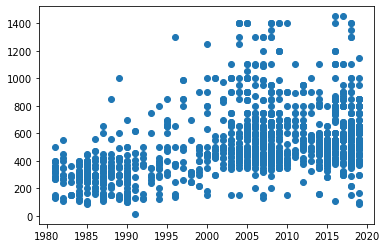

In [10]:
df["year"] = pd.to_numeric(df["year"],downcast='integer')

# plt.hist(df[df["rent_price"] < max_rent_price]["rent_price"], bins=n_bins)
plt.scatter(df[df["year"] > 1980]["year"], df[df["year"] > 1980]["rent_price"])

## Export

In [13]:
df.to_csv(".\output.csv",index=False)